In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("RELIANCE.csv")

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


In [ ]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [ ]:
df=df.sort_values(by='Date')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


<Axes: ylabel='Prev Close'>

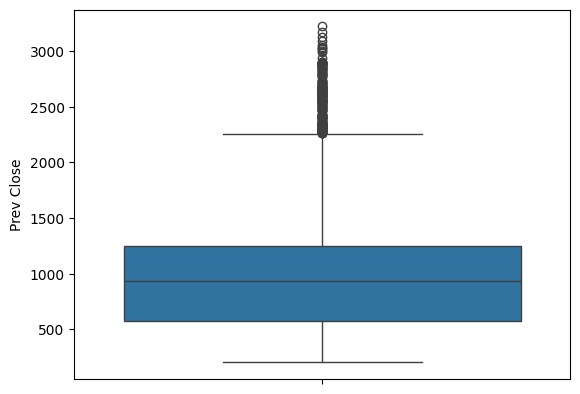

In [ ]:
sns.boxplot(df['Prev Close'])

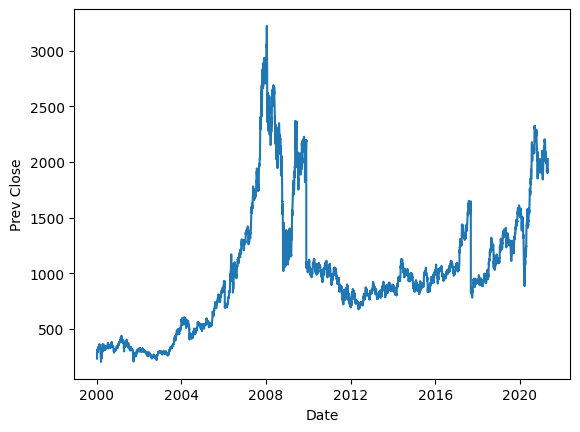

In [ ]:
sns.lineplot(data=df, x='Date', y='Prev Close')
plt.show()

In [ ]:
l=['Date','Prev Close']
df=df[l]
df

,Date,Prev Close
0,2000-01-03,233.05
1,2000-01-04,251.70
2,2000-01-05,271.85
3,2000-01-06,282.50
4,2000-01-07,294.35
...,...,...
5301,2021-04-26,1904.35
5302,2021-04-27,1937.85
5303,2021-04-28,1988.65
5304,2021-04-29,1997.30


In [ ]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df = df.groupby(['Year', 'Quarter'])['Prev Close'].mean().reset_index()
df = df.groupby(['Year']).mean().reset_index()
df

,Year,Quarter,Prev Close
0,2000,2.5,324.994246
1,2001,2.5,334.897730
2,2002,2.5,279.271099
3,2003,2.5,358.029147
4,2004,2.5,514.099562
5,2005,2.5,655.745866
6,2006,2.5,1006.917269
7,2007,2.5,1892.984069
8,2008,2.5,2106.055920
9,2009,2.5,1745.041617


In [ ]:
df.set_index("Year",inplace=True)
df

,Quarter,Prev Close
Year,,
2000,2.5,324.994246
2001,2.5,334.897730
2002,2.5,279.271099
2003,2.5,358.029147
2004,2.5,514.099562
2005,2.5,655.745866
2006,2.5,1006.917269
2007,2.5,1892.984069
2008,2.5,2106.055920


<Axes: xlabel='Year'>

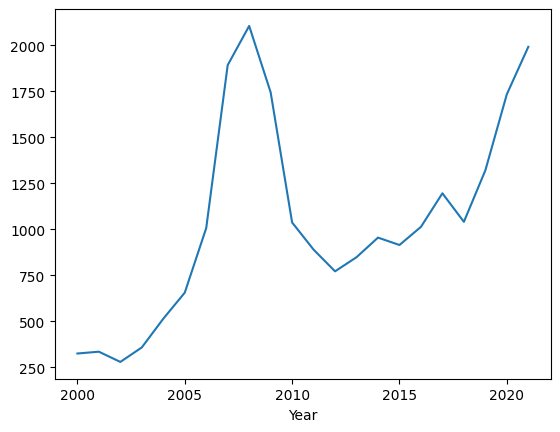

In [ ]:
# plt.figure(figsize=(10,5))
df['Prev Close'].plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive_decomposition=seasonal_decompose(df['Prev Close'],model='additive',period=1)

# Multiplicative Decomposition
multiplicative_decomposition=seasonal_decompose(df['Prev Close'],model='multiplicative',period=1)

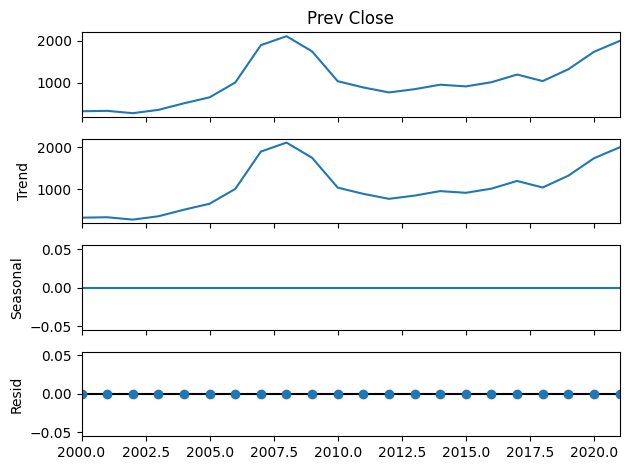

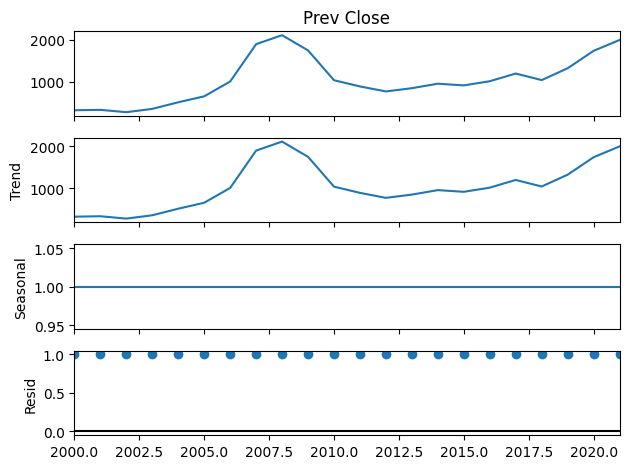

In [ ]:
additive_decomposition.plot()
plt.show()
multiplicative_decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(data):
    test_1=adfuller(data,autolag='AIC')
    dfoutput = pd.Series(test_1[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print ('\033[1m'+'Results of ADF Test:'+'\033[0m')
    print(dfoutput)

def kpss_test(data):
    test_1=kpss(data)
    dfoutput = pd.Series(test_1[0:3], index=['Test Statistic','p-value','Lags Used'])
    print ('\033[1m'+'Results of KPSS Test:'+'\033[0m')
    print(dfoutput)


In [ ]:
# Null Hypothesis: Non-Stationary
# If the p-value is less than 0.05 then reject the null hypothesis (Stationary if p<0.05 & Non-stationary if p>0.05)

adf_test(df['Prev Close'])

Results of ADF Test:
Test Statistic                 -2.382187
p-value                         0.146827
Lags Used                       1.000000
Number of Observations Used    20.000000
dtype: float64


In [ ]:
df['Prev Close'].describe()

count      22.000000
mean     1042.462179
std       555.737156
min       279.271099
25%       684.760500
50%       981.030295
75%      1289.647670
max      2106.055920
Name: Prev Close, dtype: float64

In [ ]:
df['Log_Values'] = np.log(df['Prev Close'])
# It computes the natural logarithm of the 'Prev Close' column values and stores the result in a new column named 'Log_Values'.
df['1DiffOfLog']= df['Log_Values'].diff()
# It computes the difference between consecutive values in the 'Log_Values' column and stores the result in a new column named '1DiffOfLog'.
df['Diff']= df['Prev Close'].diff(periods=1)
# It computes the difference between consecutive values in the 'Prev Close' column and stores the result in a new column named 'Diff'.
df.dropna(inplace=True)
# It removes rows containing NaN values resulting from the differencing operations, using the dropna() function with the inplace=True parameter, which modifies the DataFrame in place.
df

,Quarter,Prev Close,Log_Values,1DiffOfLog,Diff
Year,,,,,
2001,2.5,334.897730,5.813825,0.030018,9.903484
2002,2.5,279.271099,5.632183,-0.181642,-55.626631
2003,2.5,358.029147,5.880614,0.248431,78.758048
2004,2.5,514.099562,6.242417,0.361803,156.070415
2005,2.5,655.745866,6.485773,0.243356,141.646305
2006,2.5,1006.917269,6.914649,0.428875,351.171402
2007,2.5,1892.984069,7.545910,0.631261,886.066800
2008,2.5,2106.055920,7.652572,0.106663,213.071852
2009,2.5,1745.041617,7.464534,-0.188039,-361.014303


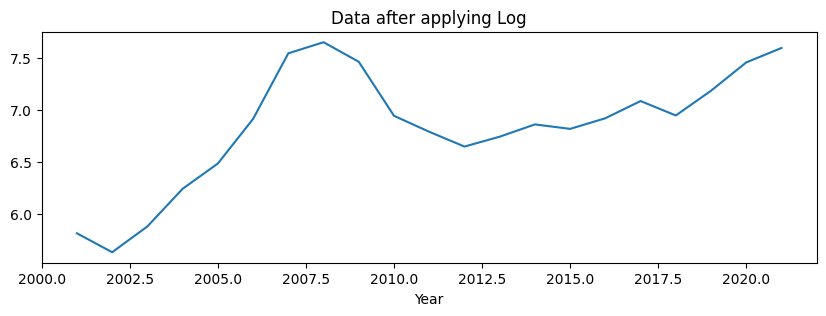

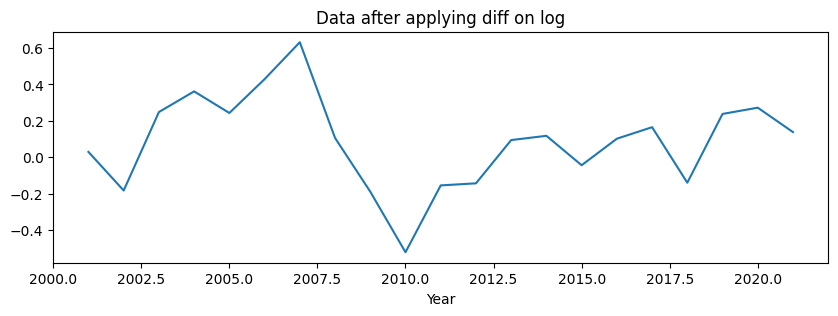

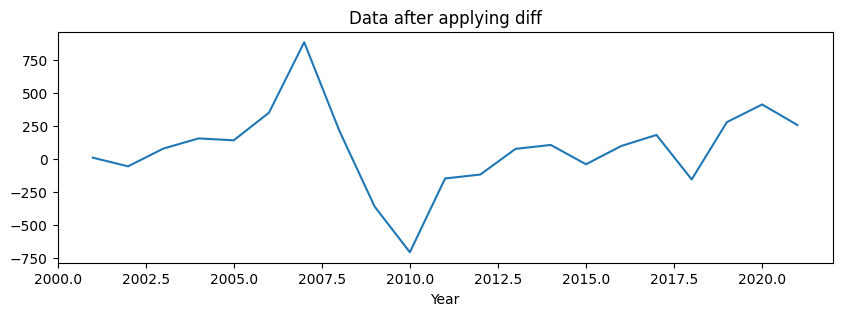

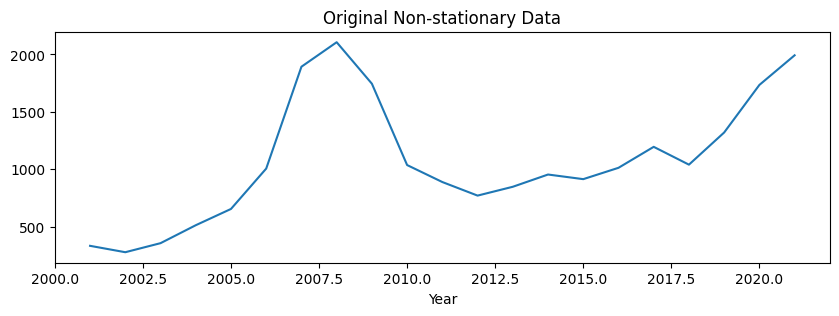

In [ ]:
plt.figure(figsize=(10,3))
df['Log_Values'].dropna().plot()
plt.title("Data after applying Log")
plt.show()

plt.figure(figsize=(10,3))
df['1DiffOfLog'].dropna().plot()
plt.title("Data after applying diff on log")
plt.show()

plt.figure(figsize=(10,3))
df['Diff'].dropna().plot()
plt.title("Data after applying diff")
plt.show()

plt.figure(figsize=(10,3))
df['Prev Close'].plot()
plt.title("Original Non-stationary Data")
plt.show()

In [ ]:
adf_test(df['Log_Values'].dropna())
print()
adf_test(df['1DiffOfLog'])
print()
adf_test(df['Diff'])

Results of ADF Test:
Test Statistic                 -3.336723
p-value                         0.013315
Lags Used                       1.000000
Number of Observations Used    19.000000
dtype: float64

Results of ADF Test:
Test Statistic                 -2.448046
p-value                         0.128632
Lags Used                       0.000000
Number of Observations Used    20.000000
dtype: float64

Results of ADF Test:
Test Statistic                 -2.481554
p-value                         0.120027
Lags Used                       0.000000
Number of Observations Used    20.000000
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf

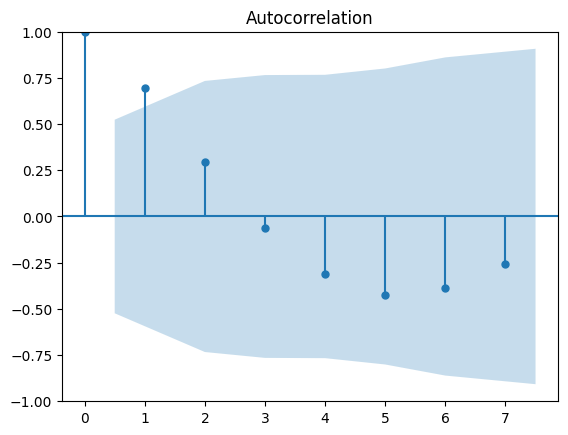

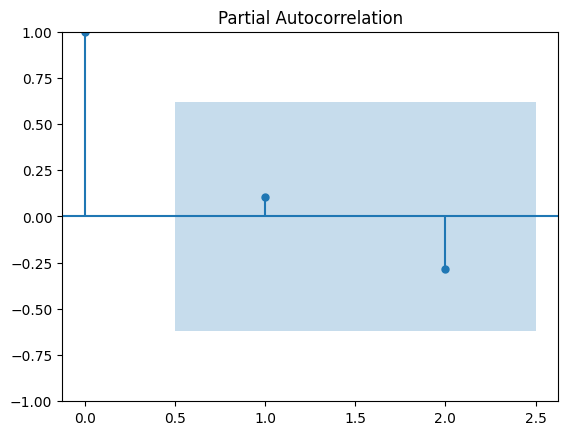

In [ ]:
# Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
# Autocorrelation measures the relationship between a variable's current value and its past values.
# An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of -1 represents a perfect negative correlation.
# Autocorrelation is used to measure how much influence past values for a variable have on its future price.

acf_plot=acf(df['Log_Values'])
plot_acf(acf_plot)

pacf_plot=pacf(df['Log_Values'])
plot_pacf(pacf_plot,lags=2);

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.2 MB/s eta 0:00:00


In [ ]:
# Trace to print the output after every step
# AIC is the score given by the model for every combination of (p,d,q). The goal is to use the order which gives the least AIC

from pmdarima import auto_arima
order=auto_arima(df['Log_Values'].dropna(),trace=True,suppress_warnings=True)
order.summary()

# Model suggests a best model is with parameters (2,0,0)
# It means that the algorithm is recommending a simple model with no differencing (d=0)
# autoregressive (AR) & moving average (MA) terms (p=2, q=0).

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5.239, Time=2.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39.554, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12.108, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=22.416, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.494, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6.112, Time=4.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3.492, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6.457, Time=0.80 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1.626, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3.539, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5.609, Time=1.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 12.489 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(2, 0, 0)   Log Likelihood                   3.187
Date:                Sun, 28 Jul 2024   AIC                              1.626
Time:                        05:30:14   BIC                              5.804
Sample:                             0   HQIC                             2.533
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6597      0.809      2.050      0.040       0.073       3.246
ar.L1          1.5144      0.148     10.210      0.000       1.224       1.805
ar.L2         -0.7554      0.130     -5.813      0.000      -1.010      -0.501
sigma2         0.0374      0.017      2.170      0.030       0.004       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.73   Prob(JB):                         0.66
Heteroskedasticity (H):               0.73   Skew:                             0.06
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train=df[:15]['Log_Values']
test=df[15:]['Log_Values']
print(train.shape,test.shape)

(15,) (6,)


In [ ]:
train

Year
2001    5.813825
2002    5.632183
2003    5.880614
2004    6.242417
2005    6.485773
2006    6.914649
2007    7.545910
2008    7.652572
2009    7.464534
2010    6.944615
2011    6.790978
2012    6.648731
2013    6.743601
2014    6.861861
2015    6.818869
Name: Log_Values, dtype: float64

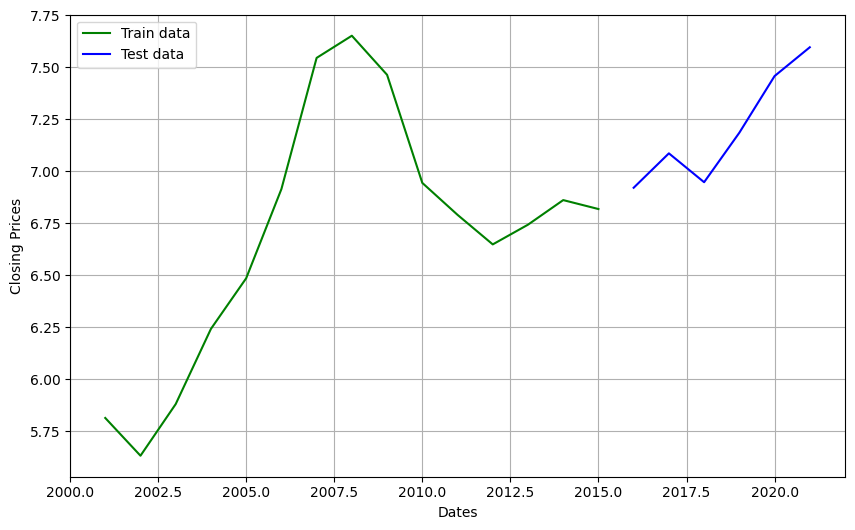

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

In [ ]:
model=ARIMA(train.dropna(),order=(2,0,0))
model=model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Log_Values   No. Observations:                   15
Model:                 ARIMA(2, 0, 0)   Log Likelihood                   2.295
Date:                Sun, 28 Jul 2024   AIC                              3.410
Time:                        05:30:34   BIC                              6.242
Sample:                             0   HQIC                             3.379
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7312      0.186     36.097      0.000       6.366       7.097
ar.L1          1.4970      0.194      7.706      0.000       1.116       1.878
ar.L2         -0.7711      0.133     -5.802      0.000      -1.032      -0.511
sigma2         0.0352      0.022      1.627      0.104      -0.007       0.078
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.89   Prob(JB):                         0.69
Heteroskedasticity (H):               0.77   Skew:                             0.36
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

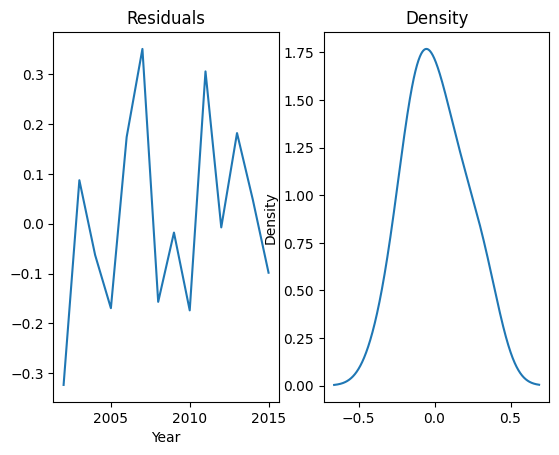

In [ ]:
residuals=model.resid[1:]
fig,ax=plt.subplots(1,2)
residuals.plot(title="Residuals",ax=ax[0])
residuals.plot(title="Density",kind='kde',ax=ax[1])
plt.show()

In [ ]:
forecast_values = model.forecast(len(test))
print("Forecasted values:", forecast_values.values)
df['Forecast']=[None]*len(train)+list(forecast_values)
df

Forecasted values: [6.76168958 6.70924228 6.67481682 6.66372175 6.67365647 6.69708378]


,Quarter,Prev Close,Log_Values,1DiffOfLog,Diff,Forecast
Year,,,,,,
2001,2.5,334.897730,5.813825,0.030018,9.903484,NaN
2002,2.5,279.271099,5.632183,-0.181642,-55.626631,NaN
2003,2.5,358.029147,5.880614,0.248431,78.758048,NaN
2004,2.5,514.099562,6.242417,0.361803,156.070415,NaN
2005,2.5,655.745866,6.485773,0.243356,141.646305,NaN
2006,2.5,1006.917269,6.914649,0.428875,351.171402,NaN
2007,2.5,1892.984069,7.545910,0.631261,886.066800,NaN
2008,2.5,2106.055920,7.652572,0.106663,213.071852,NaN
2009,2.5,1745.041617,7.464534,-0.188039,-361.014303,NaN


In [ ]:
prediction_df=pd.DataFrame(forecast_values)
prediction_df['index']=test.index
prediction_df.set_index("index",inplace=True)
prediction_df

,predicted_mean
index,
2016,6.761690
2017,6.709242
2018,6.674817
2019,6.663722
2020,6.673656
2021,6.697084


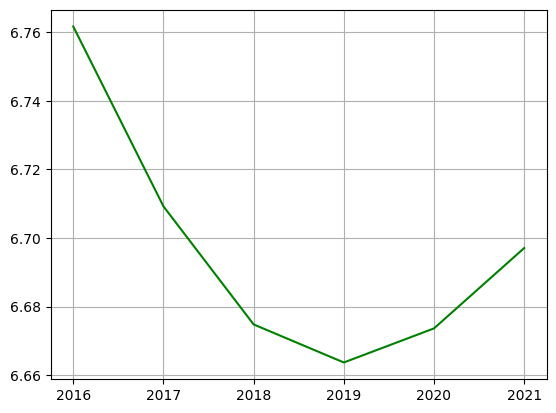

In [ ]:
plt.grid(True)
plt.plot(prediction_df['predicted_mean'],'green',label='Prediction')

In [ ]:
mae = np.mean(np.abs(prediction_df['predicted_mean'] - test))
print("Mean Absolute Error (MAE):", mae)
mse = ((prediction_df['predicted_mean'] - test) ** 2).mean()
print("Mean Squared Error (MSE):", mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse)

Mean Absolute Error (MAE): 0.5028814358371312
Mean Squared Error (MSE): 0.32354850097670057
Root Mean Squared Error (RMSE): 0.5688132391011136


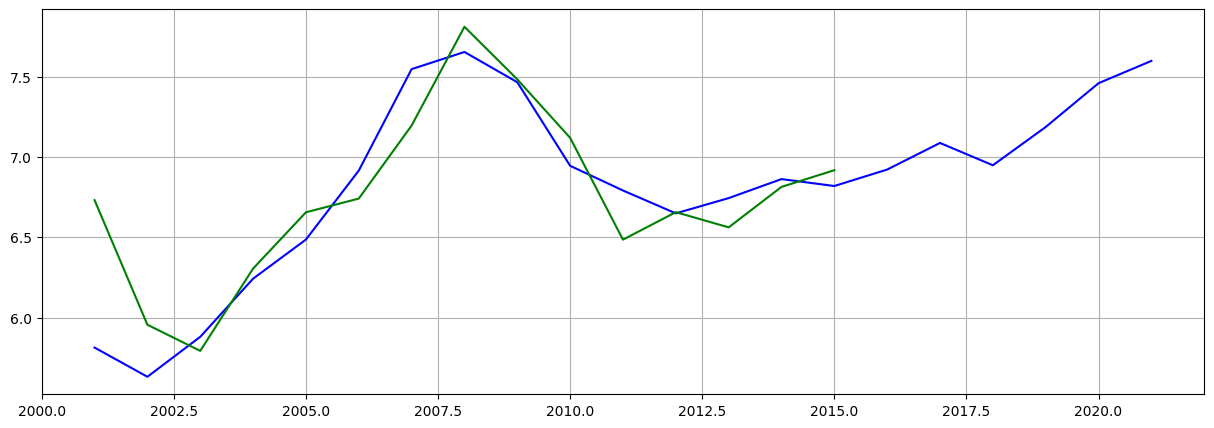

In [ ]:
pred=model.predict()
#print(prediction_df),len(prediction_df)
prediction2_df=pd.DataFrame(pred)
prediction2_df['index']=train.index
prediction2_df.set_index("index",inplace=True)
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(df['Log_Values'],'blue',label='Original Data')
plt.plot(prediction2_df['predicted_mean'],'green',label='Training')
#plt.plot(prediction_df['predicted_mean'],'red',label='Testing Data')

In [ ]:
# Forecast future values beyond the testing dataset
future_forecast = model.forecast(steps=11)
print("Forecasted values:", future_forecast)


Forecasted values: 15    6.761690
16    6.709242
17    6.674817
18    6.663722
19    6.673656
20    6.697084
21    6.724494
22    6.747464
23    6.760715
24    6.762841
25    6.755805
Name: predicted_mean, dtype: float64


In [ ]:
new_list=list(test.index)+[2022,2023,2024,2025,2026]
new_list

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]

In [ ]:
forecast_df=pd.DataFrame(future_forecast)
forecast_df['index']=new_list
forecast_df.set_index("index",inplace=True)
forecast_df=forecast_df[-5:]
forecast_df

,predicted_mean
index,
2022,6.724494
2023,6.747464
2024,6.760715
2025,6.762841
2026,6.755805


Text(0.5, 1.0, 'Line plot for the upcoming years stock price')

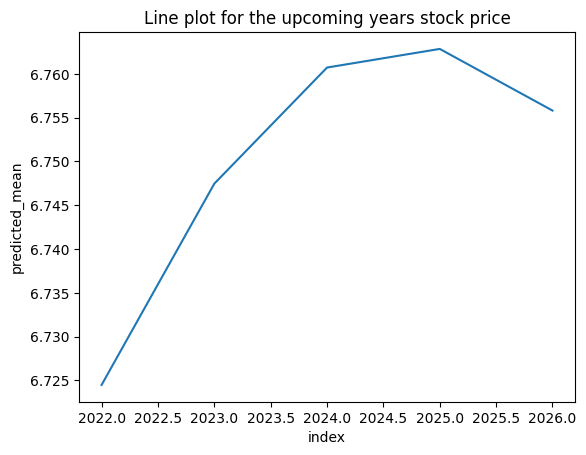

In [ ]:
sns.lineplot(forecast_df['predicted_mean'])
plt.title("Line plot for the upcoming years stock price")

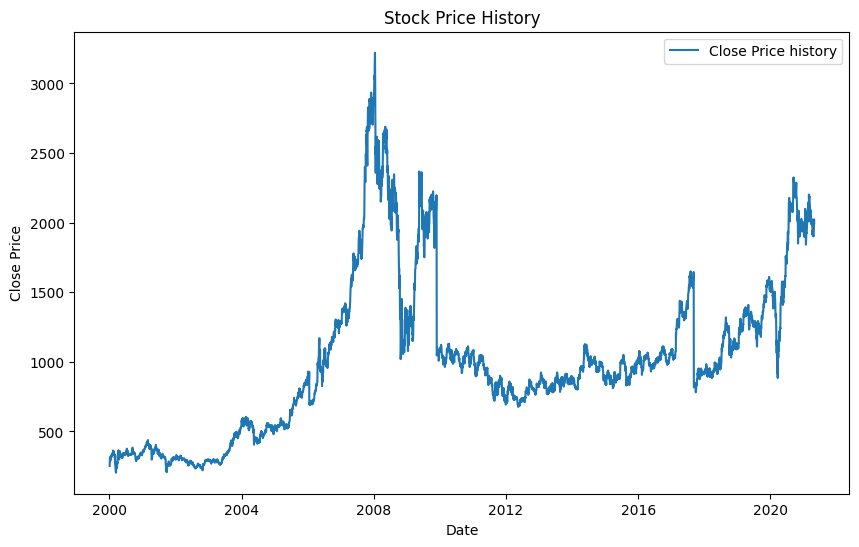

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4244
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -20727.372
Date:                Sun, 28 Jul 2024   AIC                          41466.744
Time:                        05:35:17   BIC                          41504.862
Sample:                             0   HQIC                         41480.215
                               - 4244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0358      0.008      4.609      0.000       0.021       0.051
ar.L2         -0.0041      0.009     -0.432      0.666      -0.023       0.014
ar.L3         -0.0815      0.009     -9.451      0.0

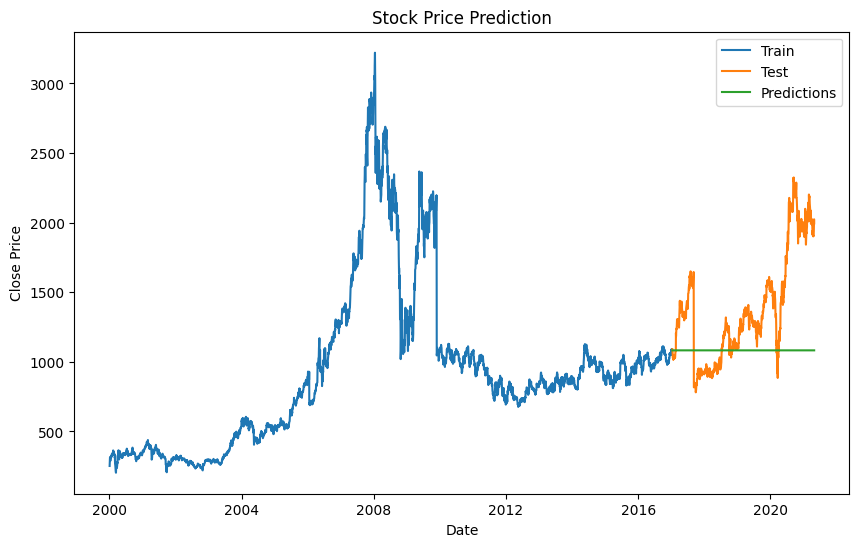

In [ ]:
data = pd.read_csv('RELIANCE.csv', parse_dates=['Date'], index_col='Date')

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price history')
plt.title('Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

train_size = int(len(data) * 0.80)
train, test = data['Close'][:train_size], data['Close'][train_size:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

predictions = model_fit.forecast(steps=len(test))

error = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {error}')

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
